In [1]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
dataset_path = '/content/drive/MyDrive/Remake'  # Ubah sesuai lokasi folder
print(os.listdir(dataset_path))


['Shepherd_purse_weeds', 'healthy', 'Bacterial', 'fungal']


In [4]:

images = []
labels = []

for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

    for image_filename in os.listdir(subfolder_path):
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        labels.append(subfolder)

df = pd.DataFrame({'image': images, 'label': labels})
df.head()

,image,label
0,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds
1,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds
2,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds
3,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds
4,/content/drive/MyDrive/Remake/Shepherd_purse_w...,Shepherd_purse_weeds


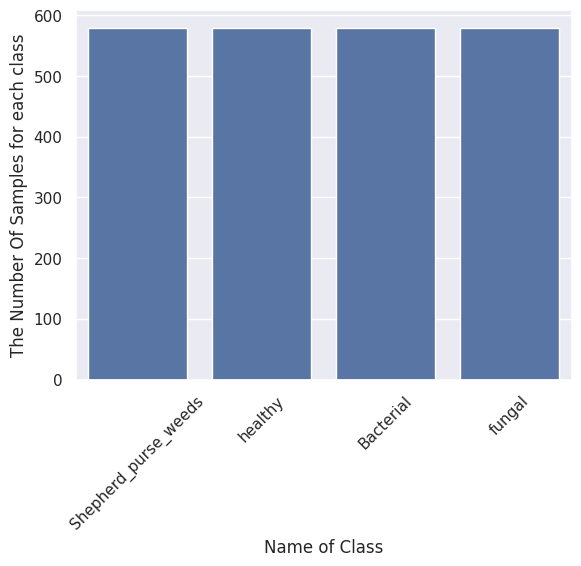

In [5]:
ax = sns.countplot(x=df.label)

ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

plt.xticks(rotation=45)

plt.show()

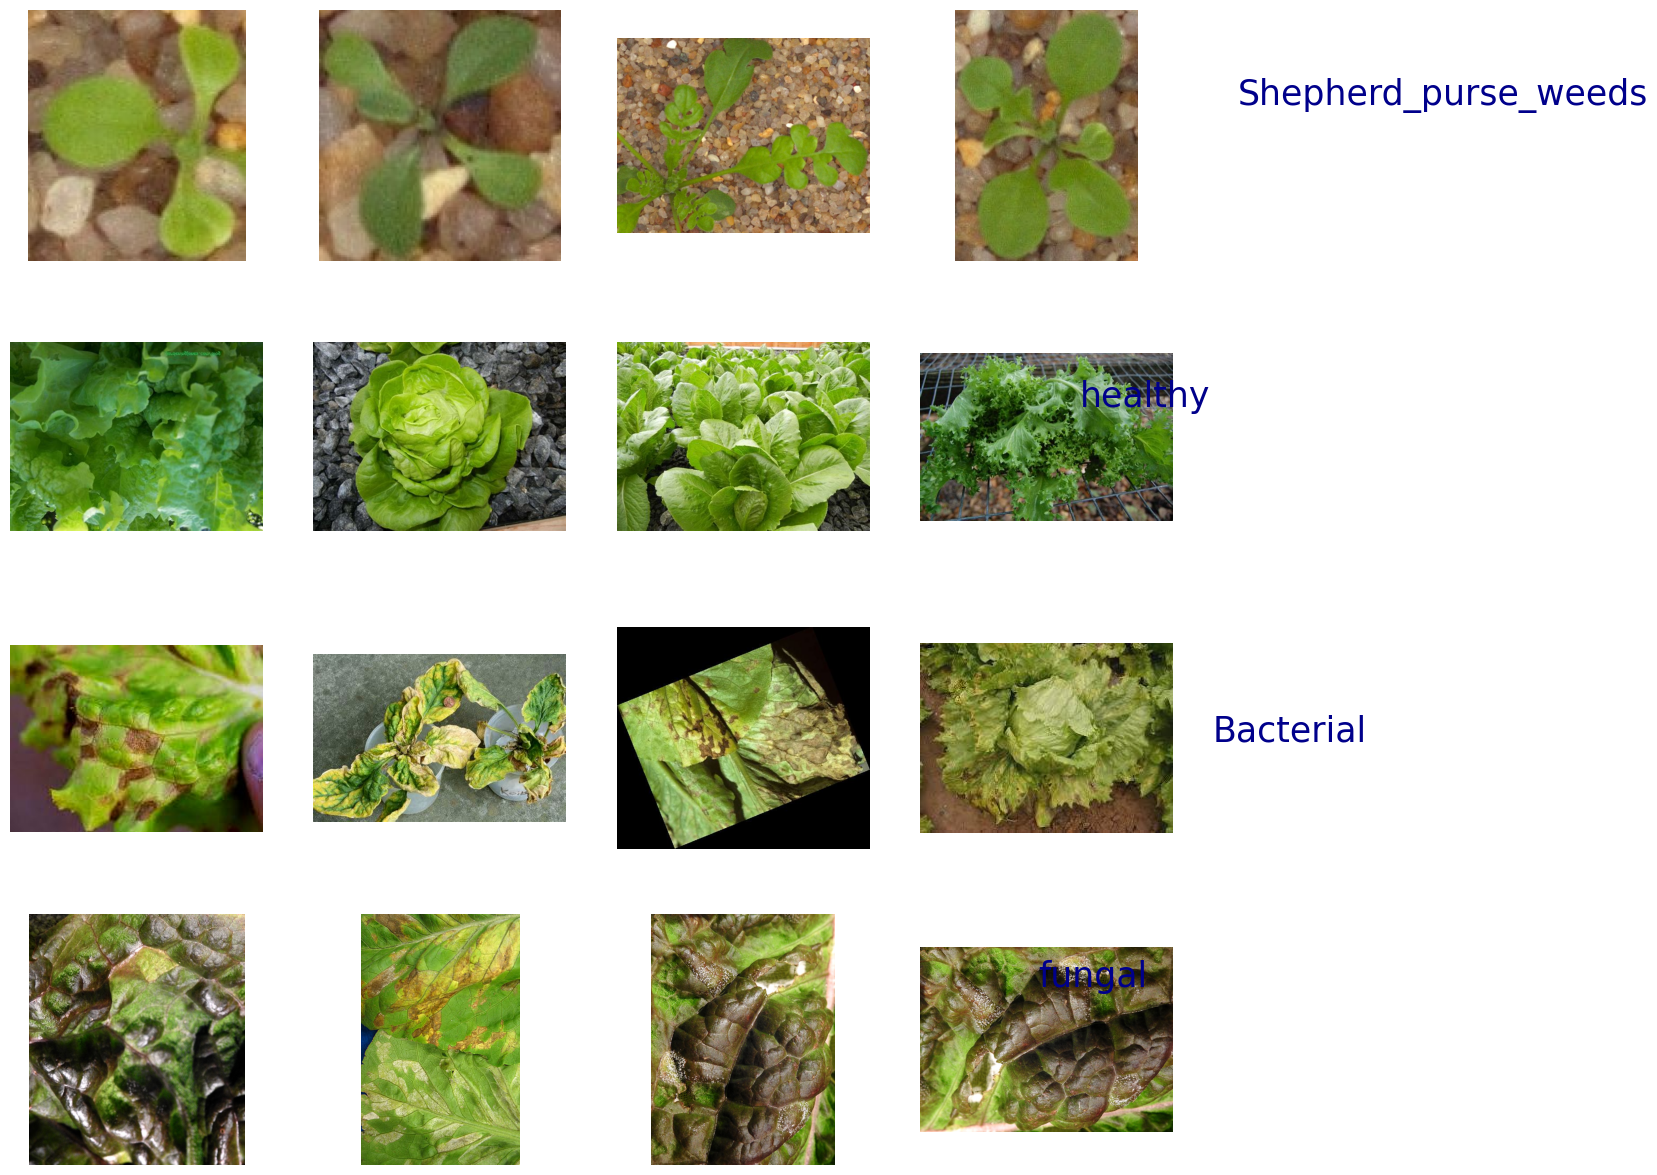

In [6]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(15, 15))
gs = GridSpec(4, 4, figure=fig)

for i, category in enumerate(df['label'].unique()):
    filepaths = df[df['label'] == category]['image'].values[:4]

    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

df_train = pd.DataFrame({'image': X_train, 'label': y_train})

df_test = pd.DataFrame({'image': X_test, 'label': y_test})

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (256, 256)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
    fill_mode='nearest'
)


train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 1856 validated image filenames belonging to 4 classes.
Found 464 validated image filenames belonging to 4 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization

model=Sequential()
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(4,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 128)       │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         401,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 925,156 (3.53 MB)

 Trainable params: 925,156 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [11]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=60)

Epoch 1/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 701s 11s/step - accuracy: 0.3073 - loss: 1.3332 - val_accuracy: 0.6099 - val_loss: 1.0121
Epoch 2/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 104s 960ms/step - accuracy: 0.6222 - loss: 0.8987 - val_accuracy: 0.6336 - val_loss: 0.8186
Epoch 3/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.6790 - loss: 0.7744 - val_accuracy: 0.7004 - val_loss: 0.6825
Epoch 4/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.7143 - loss: 0.6846 - val_accuracy: 0.7435 - val_loss: 0.6429
Epoch 5/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 930ms/step - accuracy: 0.7409 - loss: 0.6720 - val_accuracy: 0.7543 - val_loss: 0.5911
Epoch 6/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 83s 951ms/step - accuracy: 0.7866 - loss: 0.5912 - val_accuracy: 0.7780 - val_loss: 0.5473
Epoch 7/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 62s 961ms/step - accuracy: 0.7849 - loss: 0.5184 - val_accuracy: 0.7759 - val_loss: 0.5674
Epoch 8/60
58/58 ━━━━━━━━━━━━━━━━━━━━ 60s 967ms/step - accuracy: 0.8025 - loss: 0.4770 - val_accuracy: 

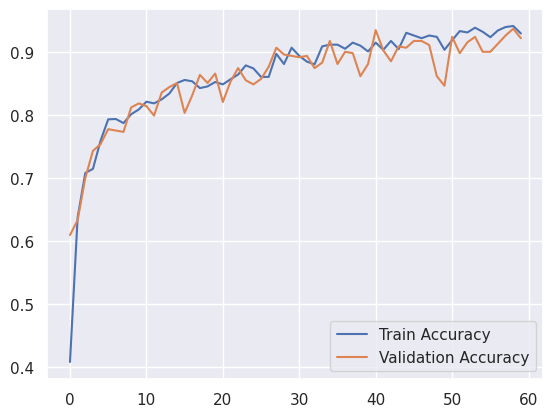

In [12]:
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

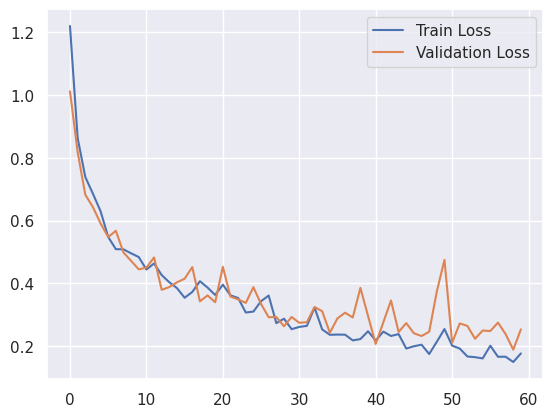

In [13]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()


In [14]:
model.evaluate(test_generator)

15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 745ms/step - accuracy: 0.9063 - loss: 0.2571


[0.2707544267177582, 0.8943965435028076]

In [15]:
model.evaluate(train_generator)

58/58 ━━━━━━━━━━━━━━━━━━━━ 46s 796ms/step - accuracy: 0.9376 - loss: 0.1494


[0.1637679934501648, 0.9348060488700867]

15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 728ms/step


<Figure size 1000x800 with 0 Axes>

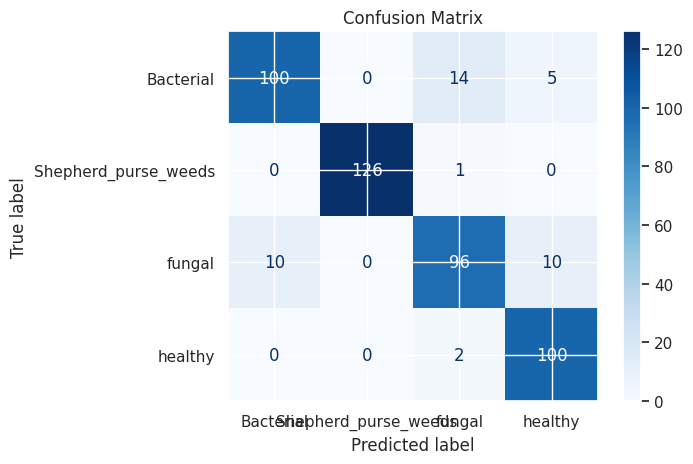

Classification Report:
                      precision    recall  f1-score   support

           Bacterial       0.91      0.84      0.87       119
Shepherd_purse_weeds       1.00      0.99      1.00       127
              fungal       0.85      0.83      0.84       116
             healthy       0.87      0.98      0.92       102

            accuracy                           0.91       464
           macro avg       0.91      0.91      0.91       464
        weighted avg       0.91      0.91      0.91       464



In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Konversi probabilitas menjadi kelas

y_true = test_generator.classes

y_true_decoded = encoder.inverse_transform(y_true)
y_pred_decoded = encoder.inverse_transform(y_pred_classes)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)

plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

print("Classification Report:")
print(classification_report(y_true_decoded, y_pred_decoded, target_names=encoder.classes_))

In [17]:
model.save('/content/drive/MyDrive/model50-lr0160.keras')